In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%cd /Users/maryamalki/Desktop/PyRICE_2022

/Users/maryamalki/Desktop/PyRICE_2022


In [3]:
# Load regions and years
regions = ['US','OECD-Europe','Japan','Russia','Non-Russia Eurasia','China','India','Middle East','Africa','Latin America','OHI','Other non-OECD Asia']
years = list(range(2005, 2310, 10))

In [4]:
# Experiments list CI and EI
exp_list= ['LL', 'LM', 'LH', 'MH', 'MM', 'ML', 'HL','HM','HH']

In [5]:
# t = pd.read_excel('results/ci_LL.xlsx', index_col='Unnamed: 0')
# c = pd.DataFrame(t.loc['US',:])
# c.rename(columns = {'US':'US LL'}, inplace = True)


In [6]:
# t2 = pd.read_excel('results/ci_LM.xlsx', index_col='Unnamed: 0')
# c2 = pd.DataFrame(t2.loc['US',:])
# c2.rename(columns = {'US':'US LM'}, inplace = True)

In [7]:
# new = pd.concat([c,c2], axis = 1)

In [8]:
# new

In [9]:
US_exp_results_ci = pd.DataFrame()
Europe_exp_results_ci = pd.DataFrame()
Japan_exp_results_ci = pd.DataFrame()
Russia_exp_results_ci = pd.DataFrame()
Eurasia_exp_results_ci = pd.DataFrame()
China_exp_results_ci = pd.DataFrame()
India_exp_results_ci = pd.DataFrame()
ME_exp_results_ci = pd.DataFrame()
Africa_exp_results_ci = pd.DataFrame()
LA_exp_results_ci = pd.DataFrame()
OHI_exp_results_ci = pd.DataFrame()
Other_Asia_exp_results_ci = pd.DataFrame()

for exp in range (len(exp_list)):
    t = pd.read_excel(f'results_final/ci_{exp_list[exp]}.xlsx', index_col='Unnamed: 0')
    for region in range(len(regions)):
        c = pd.DataFrame(t.loc[regions[region],:]).rename(columns={f'{regions[region]}':f'{exp_list[exp]}'})
        if regions[region] == 'US':
            US_exp_results_ci = pd.concat([US_exp_results_ci,c], axis = 1)
        elif regions[region] == 'OECD-Europe':
            Europe_exp_results_ci = pd.concat([Europe_exp_results_ci,c], axis = 1)
        elif regions[region] == 'Japan':
            Japan_exp_results_ci = pd.concat([Japan_exp_results_ci,c], axis = 1)
        elif regions[region] == 'Russia':
            Russia_exp_results_ci = pd.concat([Russia_exp_results_ci,c], axis = 1)
        elif regions[region] == 'Non-Russia Eurasia':
            Eurasia_exp_results_ci = pd.concat([Eurasia_exp_results_ci,c], axis = 1)
        elif regions[region] == 'China':
            China_exp_results_ci = pd.concat([China_exp_results_ci,c], axis = 1)
        elif regions[region] == 'India':
            India_exp_results_ci = pd.concat([India_exp_results_ci,c], axis = 1)
        elif regions[region] == 'Middle East':
            ME_exp_results_ci = pd.concat([ME_exp_results_ci,c], axis = 1)
        elif regions[region] == 'Africa':
            Africa_exp_results_ci = pd.concat([Africa_exp_results_ci,c], axis = 1)
        elif regions[region] == 'Latin America':
            LA_exp_results_ci = pd.concat([LA_exp_results_ci,c], axis = 1)
        elif regions[region] == 'OHI':
            OHI_exp_results_ci = pd.concat([OHI_exp_results_ci,c], axis = 1)
        else:
            Other_Asia_exp_results_ci = pd.concat([Other_Asia_exp_results_ci,c], axis = 1)

In [10]:
US_exp_results_ci

,LL,LM,LH,MH,MM,ML,HL,HM,HH
2005,0.237165,0.237165,0.237165,0.237165,0.237165,0.237165,0.237165,0.237165,0.237165
2015,0.236258,0.236258,0.236258,0.236258,0.236258,0.236258,0.236258,0.236258,0.236258
2025,0.235362,0.235362,0.235362,0.235366,0.235366,0.235366,0.235381,0.235381,0.235381
2035,0.234478,0.234478,0.234478,0.234491,0.234491,0.234491,0.234534,0.234534,0.234534
2045,0.233605,0.233605,0.233605,0.233631,0.233631,0.233631,0.233715,0.233715,0.233715
2055,0.232743,0.232743,0.232743,0.232786,0.232786,0.232786,0.232923,0.232923,0.232923
2065,0.231892,0.231892,0.231892,0.231957,0.231957,0.231957,0.232158,0.232158,0.232158
2075,0.231052,0.231052,0.231052,0.231141,0.231141,0.231141,0.231418,0.231418,0.231418
2085,0.230222,0.230222,0.230222,0.230340,0.230340,0.230340,0.230702,0.230702,0.230702
2095,0.229403,0.229403,0.229403,0.229553,0.229553,0.229553,0.230010,0.230010,0.230010


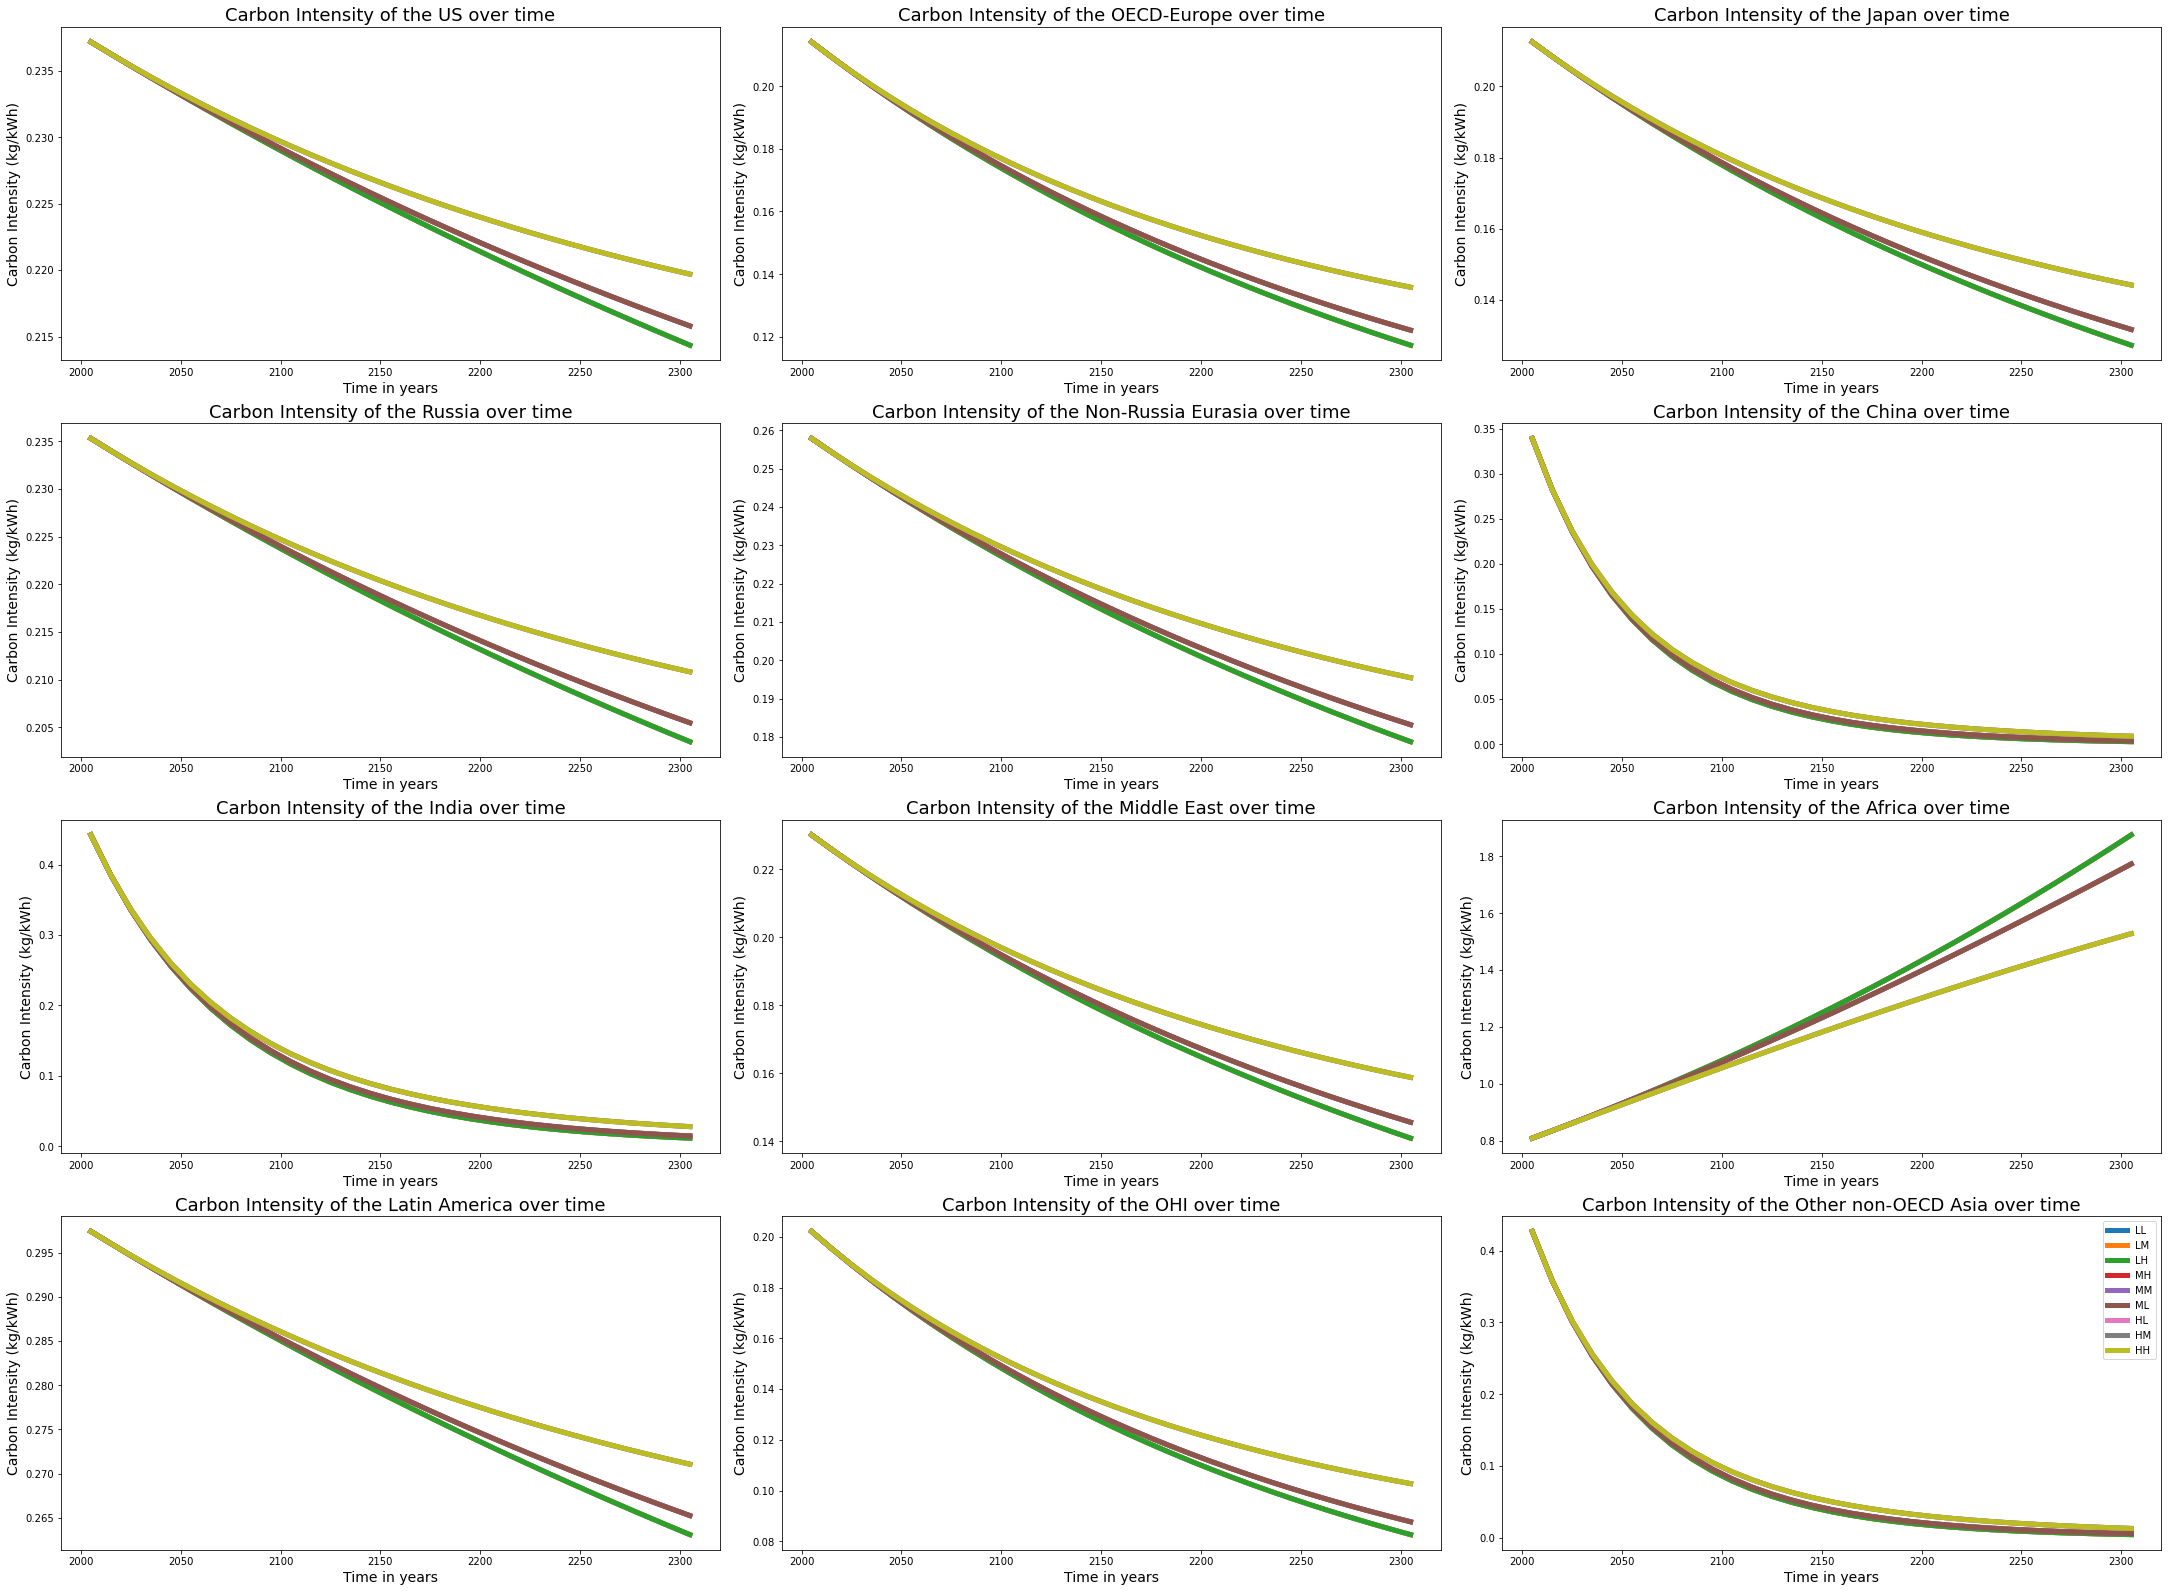

In [11]:
mosaic = [
        ["US", "OECD-Europe",'Japan'],
        ["Russia", "Non-Russia Eurasia",'China'],
        ["India","Middle East","Africa"],
        ["Latin America","OHI","Other non-OECD Asia"]
    ]
line_with = 5
fig = plt.figure(constrained_layout=True, figsize=(30, 22))
ax_dict = fig.subplot_mosaic(mosaic)

ax_dict["US"].plot(years, US_exp_results_ci, linewidth=line_with, label= US_exp_results_ci.columns)
ax_dict["US"].set_title(f'Carbon Intensity of the US over time', fontsize = 18)
ax_dict["US"].set_xlabel('Time in years', fontsize = 14)
ax_dict["US"].set_ylabel('Carbon Intensity (kg/kWh)', fontsize = 14)


ax_dict["OECD-Europe"].plot(years, Europe_exp_results_ci, linewidth=line_with, label= Europe_exp_results_ci.columns)
ax_dict["OECD-Europe"].set_title(f'Carbon Intensity of the OECD-Europe over time', fontsize = 18)
ax_dict["OECD-Europe"].set_xlabel('Time in years', fontsize = 14)
ax_dict["OECD-Europe"].set_ylabel('Carbon Intensity (kg/kWh)', fontsize = 14)


ax_dict["Japan"].plot(years, Japan_exp_results_ci, linewidth=line_with, label= Japan_exp_results_ci.columns)
ax_dict["Japan"].set_title(f'Carbon Intensity of the Japan over time', fontsize = 18)
ax_dict["Japan"].set_xlabel('Time in years', fontsize = 14)
ax_dict["Japan"].set_ylabel('Carbon Intensity (kg/kWh)', fontsize = 14)


ax_dict["Russia"].plot(years, Russia_exp_results_ci, linewidth=line_with, label= Russia_exp_results_ci.columns)
ax_dict["Russia"].set_title(f'Carbon Intensity of the Russia over time', fontsize = 18)
ax_dict["Russia"].set_xlabel('Time in years', fontsize = 14)
ax_dict["Russia"].set_ylabel('Carbon Intensity (kg/kWh)', fontsize = 14)


ax_dict["Non-Russia Eurasia"].plot(years, Eurasia_exp_results_ci, linewidth=line_with, label= Eurasia_exp_results_ci.columns)
ax_dict["Non-Russia Eurasia"].set_title(f'Carbon Intensity of the Non-Russia Eurasia over time', fontsize = 18)
ax_dict["Non-Russia Eurasia"].set_xlabel('Time in years', fontsize = 14)
ax_dict["Non-Russia Eurasia"].set_ylabel('Carbon Intensity (kg/kWh)', fontsize = 14)


ax_dict["China"].plot(years, China_exp_results_ci, linewidth=line_with, label= China_exp_results_ci.columns)
ax_dict["China"].set_title(f'Carbon Intensity of the China over time', fontsize = 18)
ax_dict["China"].set_xlabel('Time in years', fontsize = 14)
ax_dict["China"].set_ylabel('Carbon Intensity (kg/kWh)', fontsize = 14)


ax_dict["India"].plot(years, India_exp_results_ci, linewidth=line_with, label= India_exp_results_ci.columns)
ax_dict["India"].set_title(f'Carbon Intensity of the India over time', fontsize = 18)
ax_dict["India"].set_xlabel('Time in years', fontsize = 14)
ax_dict["India"].set_ylabel('Carbon Intensity (kg/kWh)', fontsize = 14)


ax_dict["Middle East"].plot(years, ME_exp_results_ci, linewidth=line_with, label= ME_exp_results_ci.columns)
ax_dict["Middle East"].set_title(f'Carbon Intensity of the Middle East over time', fontsize = 18)
ax_dict["Middle East"].set_xlabel('Time in years', fontsize = 14)
ax_dict["Middle East"].set_ylabel('Carbon Intensity (kg/kWh)', fontsize = 14)


ax_dict["Africa"].plot(years, Africa_exp_results_ci, linewidth=line_with, label= Africa_exp_results_ci.columns)
ax_dict["Africa"].set_title(f'Carbon Intensity of the Africa over time', fontsize = 18)
ax_dict["Africa"].set_xlabel('Time in years', fontsize = 14)
ax_dict["Africa"].set_ylabel('Carbon Intensity (kg/kWh)', fontsize = 14)


ax_dict["Latin America"].plot(years, LA_exp_results_ci, linewidth=line_with, label= LA_exp_results_ci.columns)
ax_dict["Latin America"].set_title(f'Carbon Intensity of the Latin America over time', fontsize = 18)
ax_dict["Latin America"].set_xlabel('Time in years', fontsize = 14)
ax_dict["Latin America"].set_ylabel('Carbon Intensity (kg/kWh)', fontsize = 14)


ax_dict["OHI"].plot(years, OHI_exp_results_ci, linewidth=line_with, label= OHI_exp_results_ci.columns)
ax_dict["OHI"].set_title(f'Carbon Intensity of the OHI over time', fontsize = 18)
ax_dict["OHI"].set_xlabel('Time in years', fontsize = 14)
ax_dict["OHI"].set_ylabel('Carbon Intensity (kg/kWh)', fontsize = 14)


ax_dict["Other non-OECD Asia"].plot(years, Other_Asia_exp_results_ci, linewidth=line_with, label= Other_Asia_exp_results_ci.columns)
ax_dict["Other non-OECD Asia"].set_title(f'Carbon Intensity of the Other non-OECD Asia over time', fontsize = 18)
ax_dict["Other non-OECD Asia"].set_xlabel('Time in years', fontsize = 14)
ax_dict["Other non-OECD Asia"].set_ylabel('Carbon Intensity (kg/kWh)', fontsize = 14)


plt.legend()
plt.show()

In [12]:
US_exp_results_ei = pd.DataFrame()
Europe_exp_results_ei = pd.DataFrame()
Japan_exp_results_ei = pd.DataFrame()
Russia_exp_results_ei = pd.DataFrame()
Eurasia_exp_results_ei = pd.DataFrame()
China_exp_results_ei = pd.DataFrame()
India_exp_results_ei = pd.DataFrame()
ME_exp_results_ei = pd.DataFrame()
Africa_exp_results_ei = pd.DataFrame()
LA_exp_results_ei = pd.DataFrame()
OHI_exp_results_ei = pd.DataFrame()
Other_Asia_exp_results_ei = pd.DataFrame()

for exp in range (len(exp_list)):
    t = pd.read_excel(f'results_final/ei_{exp_list[exp]}.xlsx', index_col='Unnamed: 0')
    for region in range(len(regions)):
        c = pd.DataFrame(t.loc[regions[region],:]).rename(columns={f'{regions[region]}':f'{exp_list[exp]}'})
        if regions[region] == 'US':
            US_exp_results_ei = pd.concat([US_exp_results_ei,c], axis = 1)
        elif regions[region] == 'OECD-Europe':
            Europe_exp_results_ei = pd.concat([Europe_exp_results_ei,c], axis = 1)
        elif regions[region] == 'Japan':
            Japan_exp_results_ei = pd.concat([Japan_exp_results_ei,c], axis = 1)
        elif regions[region] == 'Russia':
            Russia_exp_results_ei = pd.concat([Russia_exp_results_ei,c], axis = 1)
        elif regions[region] == 'Non-Russia Eurasia':
            Eurasia_exp_results_ei = pd.concat([Eurasia_exp_results_ei,c], axis = 1)
        elif regions[region] == 'China':
            China_exp_results_ei = pd.concat([China_exp_results_ei,c], axis = 1)
        elif regions[region] == 'India':
            India_exp_results_ei = pd.concat([India_exp_results_ei,c], axis = 1)
        elif regions[region] == 'Middle East':
            ME_exp_results_ei = pd.concat([ME_exp_results_ei,c], axis = 1)
        elif regions[region] == 'Africa':
            Africa_exp_results_ei = pd.concat([Africa_exp_results_ei,c], axis = 1)
        elif regions[region] == 'Latin America':
            LA_exp_results_ei = pd.concat([LA_exp_results_ei,c], axis = 1)
        elif regions[region] == 'OHI':
            OHI_exp_results_ei = pd.concat([OHI_exp_results_ei,c], axis = 1)
        else:
            Other_Asia_exp_results_ei = pd.concat([Other_Asia_exp_results_ei,c], axis = 1)

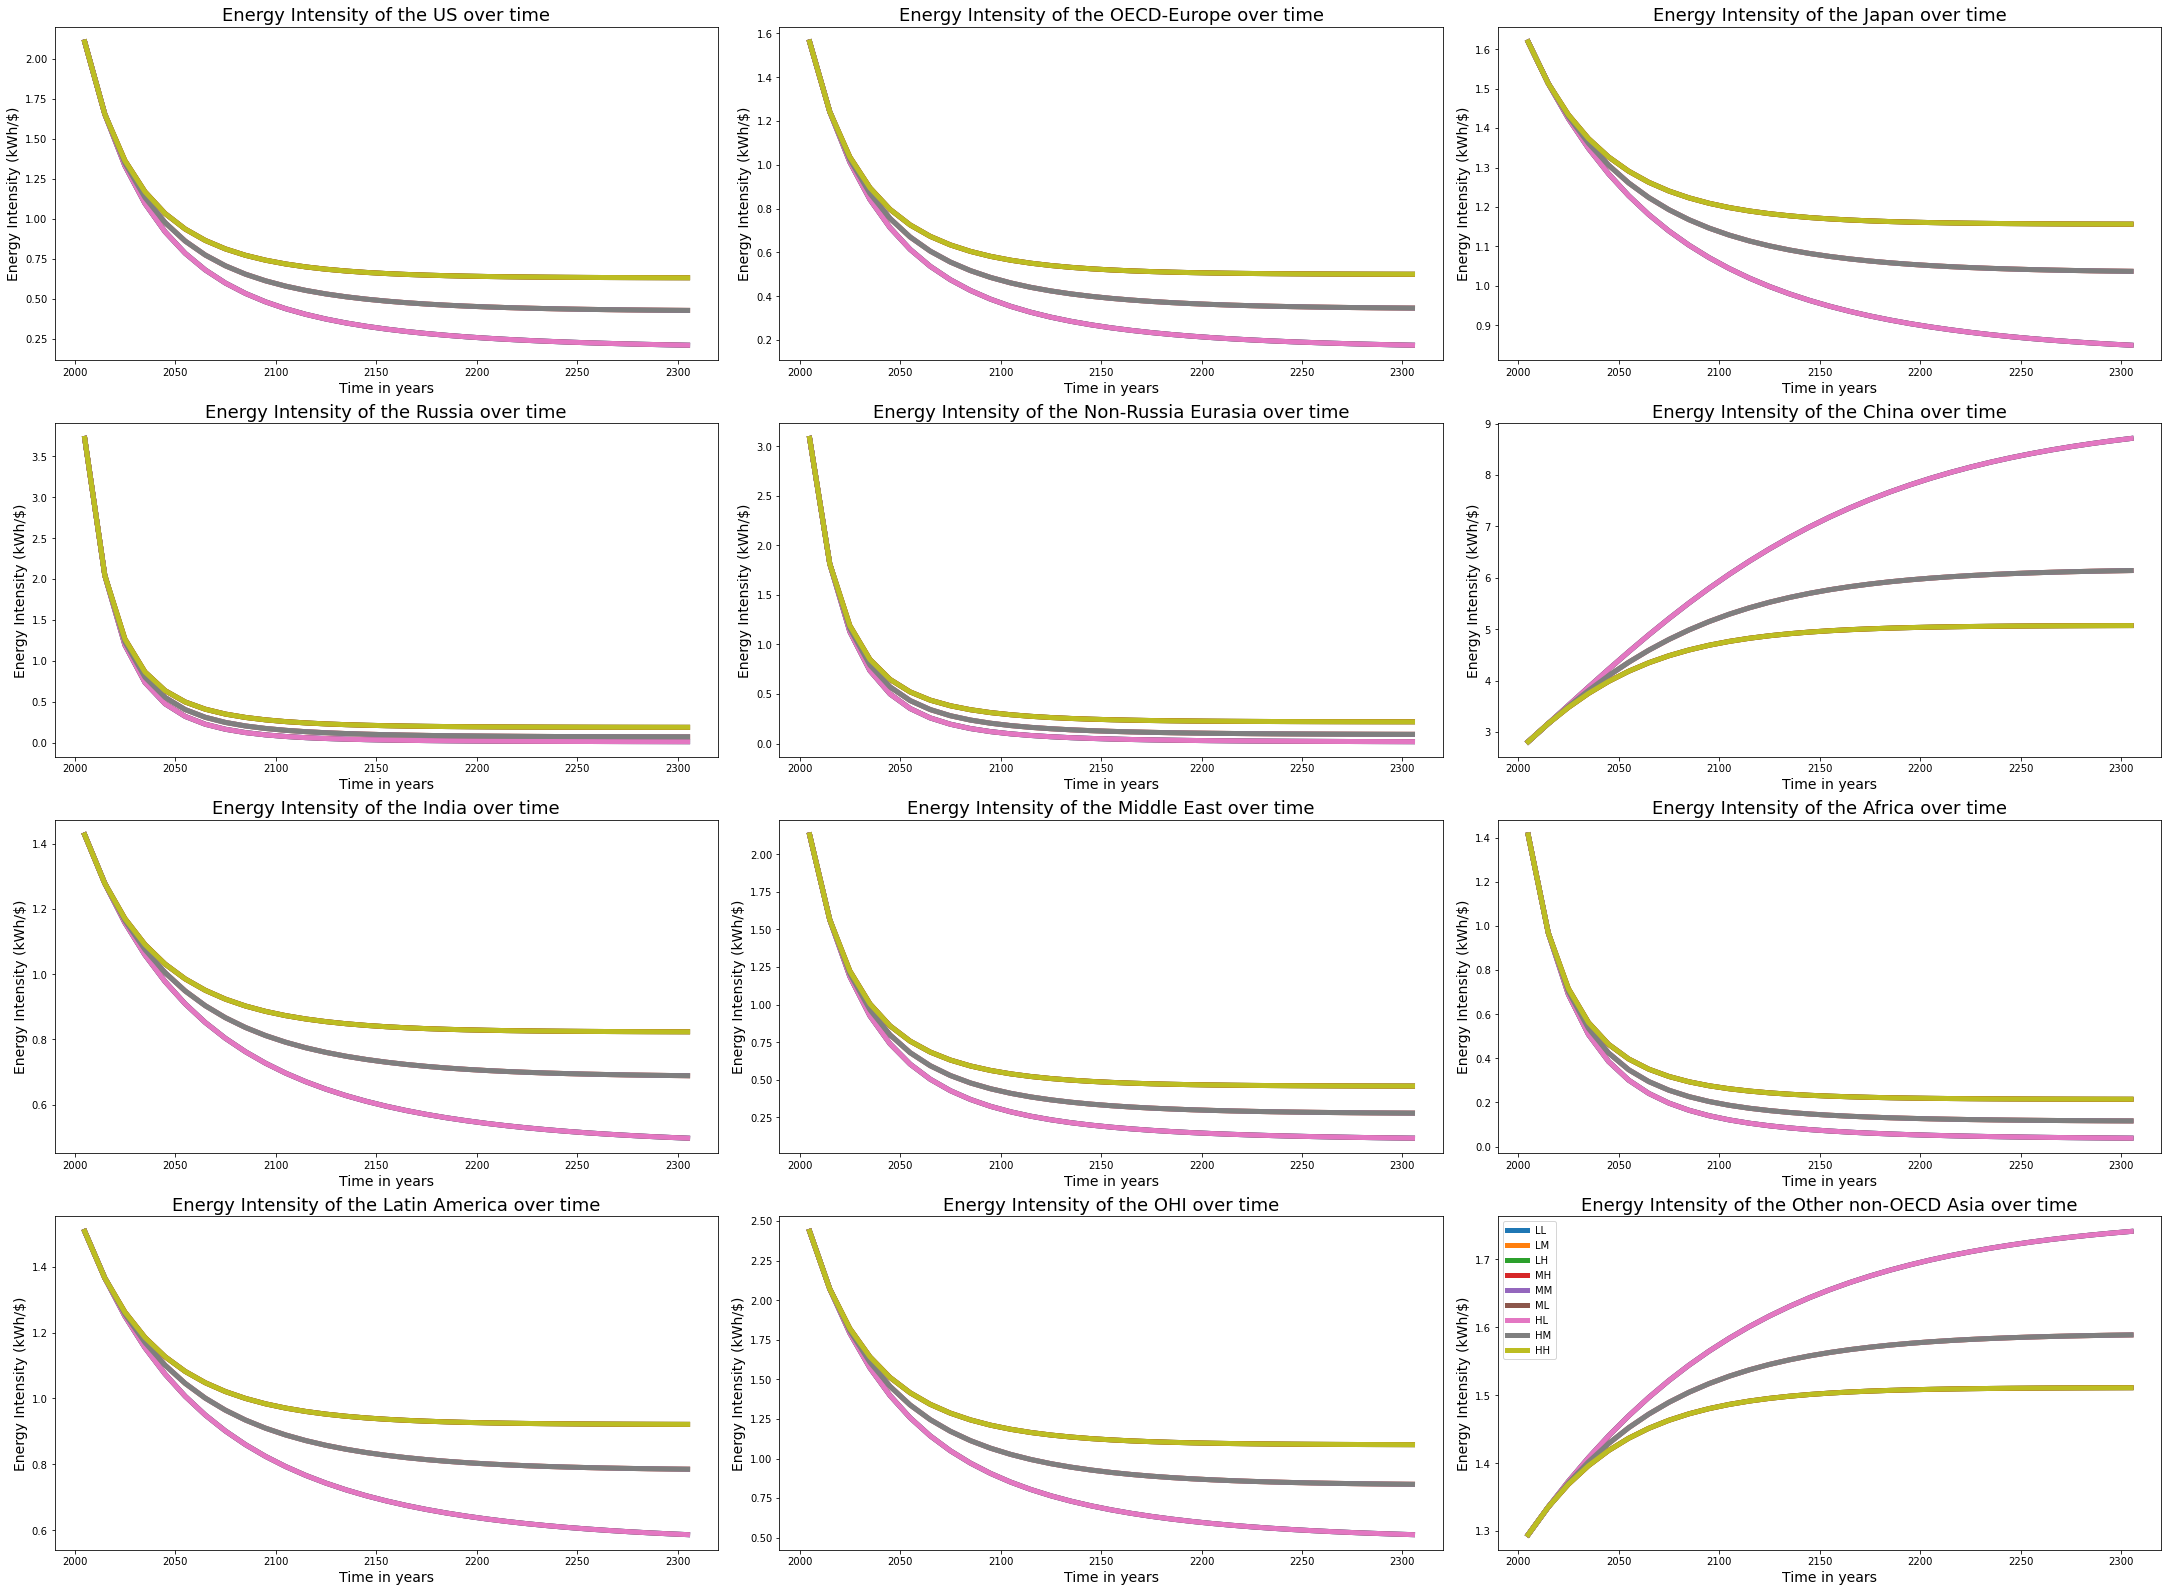

In [13]:
mosaic = [
        ["US", "OECD-Europe",'Japan'],
        ["Russia", "Non-Russia Eurasia",'China'],
        ["India","Middle East","Africa"],
        ["Latin America","OHI","Other non-OECD Asia"]
    ]
line_with = 5
fig = plt.figure(constrained_layout=True, figsize=(30, 22))
ax_dict = fig.subplot_mosaic(mosaic)

ax_dict["US"].plot(years, US_exp_results_ei, linewidth=line_with, label= US_exp_results_ei.columns)
ax_dict["US"].set_title(f'Energy Intensity of the US over time', fontsize = 18)
ax_dict["US"].set_xlabel('Time in years', fontsize = 14)
ax_dict["US"].set_ylabel('Energy Intensity (kWh/$)', fontsize = 14)


ax_dict["OECD-Europe"].plot(years, Europe_exp_results_ei, linewidth=line_with, label= Europe_exp_results_ei.columns)
ax_dict["OECD-Europe"].set_title(f'Energy Intensity of the OECD-Europe over time', fontsize = 18)
ax_dict["OECD-Europe"].set_xlabel('Time in years', fontsize = 14)
ax_dict["OECD-Europe"].set_ylabel('Energy Intensity (kWh/$)', fontsize = 14)


ax_dict["Japan"].plot(years, Japan_exp_results_ei, linewidth=line_with, label= Japan_exp_results_ei.columns)
ax_dict["Japan"].set_title(f'Energy Intensity of the Japan over time', fontsize = 18)
ax_dict["Japan"].set_xlabel('Time in years', fontsize = 14)
ax_dict["Japan"].set_ylabel('Energy Intensity (kWh/$)', fontsize = 14)


ax_dict["Russia"].plot(years, Russia_exp_results_ei, linewidth=line_with, label= Russia_exp_results_ei.columns)
ax_dict["Russia"].set_title(f'Energy Intensity of the Russia over time', fontsize = 18)
ax_dict["Russia"].set_xlabel('Time in years', fontsize = 14)
ax_dict["Russia"].set_ylabel('Energy Intensity (kWh/$)', fontsize = 14)


ax_dict["Non-Russia Eurasia"].plot(years, Eurasia_exp_results_ei, linewidth=line_with, label= Eurasia_exp_results_ei.columns)
ax_dict["Non-Russia Eurasia"].set_title(f'Energy Intensity of the Non-Russia Eurasia over time', fontsize = 18)
ax_dict["Non-Russia Eurasia"].set_xlabel('Time in years', fontsize = 14)
ax_dict["Non-Russia Eurasia"].set_ylabel('Energy Intensity (kWh/$)', fontsize = 14)


ax_dict["China"].plot(years, China_exp_results_ei, linewidth=line_with, label= China_exp_results_ei.columns)
ax_dict["China"].set_title(f'Energy Intensity of the China over time', fontsize = 18)
ax_dict["China"].set_xlabel('Time in years', fontsize = 14)
ax_dict["China"].set_ylabel('Energy Intensity (kWh/$)', fontsize = 14)


ax_dict["India"].plot(years, India_exp_results_ei, linewidth=line_with, label= India_exp_results_ei.columns)
ax_dict["India"].set_title(f'Energy Intensity of the India over time', fontsize = 18)
ax_dict["India"].set_xlabel('Time in years', fontsize = 14)
ax_dict["India"].set_ylabel('Energy Intensity (kWh/$)', fontsize = 14)


ax_dict["Middle East"].plot(years, ME_exp_results_ei, linewidth=line_with, label= ME_exp_results_ei.columns)
ax_dict["Middle East"].set_title(f'Energy Intensity of the Middle East over time', fontsize = 18)
ax_dict["Middle East"].set_xlabel('Time in years', fontsize = 14)
ax_dict["Middle East"].set_ylabel('Energy Intensity (kWh/$)', fontsize = 14)


ax_dict["Africa"].plot(years, Africa_exp_results_ei, linewidth=line_with, label= Africa_exp_results_ei.columns)
ax_dict["Africa"].set_title(f'Energy Intensity of the Africa over time', fontsize = 18)
ax_dict["Africa"].set_xlabel('Time in years', fontsize = 14)
ax_dict["Africa"].set_ylabel('Energy Intensity (kWh/$)', fontsize = 14)


ax_dict["Latin America"].plot(years, LA_exp_results_ei, linewidth=line_with, label= LA_exp_results_ei.columns)
ax_dict["Latin America"].set_title(f'Energy Intensity of the Latin America over time', fontsize = 18)
ax_dict["Latin America"].set_xlabel('Time in years', fontsize = 14)
ax_dict["Latin America"].set_ylabel('Energy Intensity (kWh/$)', fontsize = 14)


ax_dict["OHI"].plot(years, OHI_exp_results_ei, linewidth=line_with, label= OHI_exp_results_ei.columns)
ax_dict["OHI"].set_title(f'Energy Intensity of the OHI over time', fontsize = 18)
ax_dict["OHI"].set_xlabel('Time in years', fontsize = 14)
ax_dict["OHI"].set_ylabel('Energy Intensity (kWh/$)', fontsize = 14)


ax_dict["Other non-OECD Asia"].plot(years, Other_Asia_exp_results_ei, linewidth=line_with, label= Other_Asia_exp_results_ei.columns)
ax_dict["Other non-OECD Asia"].set_title(f'Energy Intensity of the Other non-OECD Asia over time', fontsize = 18)
ax_dict["Other non-OECD Asia"].set_xlabel('Time in years', fontsize = 14)
ax_dict["Other non-OECD Asia"].set_ylabel('Energy Intensity (kWh/$)', fontsize = 14)


plt.legend()
plt.show()

In [14]:
US_exp_results_sigma = pd.DataFrame()
Europe_exp_results_sigma = pd.DataFrame()
Japan_exp_results_sigma = pd.DataFrame()
Russia_exp_results_sigma = pd.DataFrame()
Eurasia_exp_results_sigma = pd.DataFrame()
China_exp_results_sigma = pd.DataFrame()
India_exp_results_sigma = pd.DataFrame()
ME_exp_results_sigma = pd.DataFrame()
Africa_exp_results_sigma = pd.DataFrame()
LA_exp_results_sigma = pd.DataFrame()
OHI_exp_results_sigma = pd.DataFrame()
Other_Asia_exp_results_sigma = pd.DataFrame()

for exp in range (len(exp_list)):
    t = pd.read_excel(f'results_final/sigma_{exp_list[exp]}.xlsx', index_col='Unnamed: 0')
    for region in range(len(regions)):
        c = pd.DataFrame(t.loc[regions[region],:]).rename(columns={f'{regions[region]}':f'{exp_list[exp]}'})
        if regions[region] == 'US':
            US_exp_results_sigma = pd.concat([US_exp_results_sigma,c], axis = 1)
        elif regions[region] == 'OECD-Europe':
            Europe_exp_results_sigma = pd.concat([Europe_exp_results_sigma,c], axis = 1)
        elif regions[region] == 'Japan':
            Japan_exp_results_sigma = pd.concat([Japan_exp_results_sigma,c], axis = 1)
        elif regions[region] == 'Russia':
            Russia_exp_results_sigma = pd.concat([Russia_exp_results_sigma,c], axis = 1)
        elif regions[region] == 'Non-Russia Eurasia':
            Eurasia_exp_results_sigma = pd.concat([Eurasia_exp_results_sigma,c], axis = 1)
        elif regions[region] == 'China':
            China_exp_results_sigma = pd.concat([China_exp_results_sigma,c], axis = 1)
        elif regions[region] == 'India':
            India_exp_results_sigma = pd.concat([India_exp_results_sigma,c], axis = 1)
        elif regions[region] == 'Middle East':
            ME_exp_results_sigma = pd.concat([ME_exp_results_sigma,c], axis = 1)
        elif regions[region] == 'Africa':
            Africa_exp_results_sigma = pd.concat([Africa_exp_results_sigma,c], axis = 1)
        elif regions[region] == 'Latin America':
            LA_exp_results_sigma = pd.concat([LA_exp_results_sigma,c], axis = 1)
        elif regions[region] == 'OHI':
            OHI_exp_results_sigma = pd.concat([OHI_exp_results_sigma,c], axis = 1)
        else:
            Other_Asia_exp_results_sigma = pd.concat([Other_Asia_exp_results_sigma,c], axis = 1)

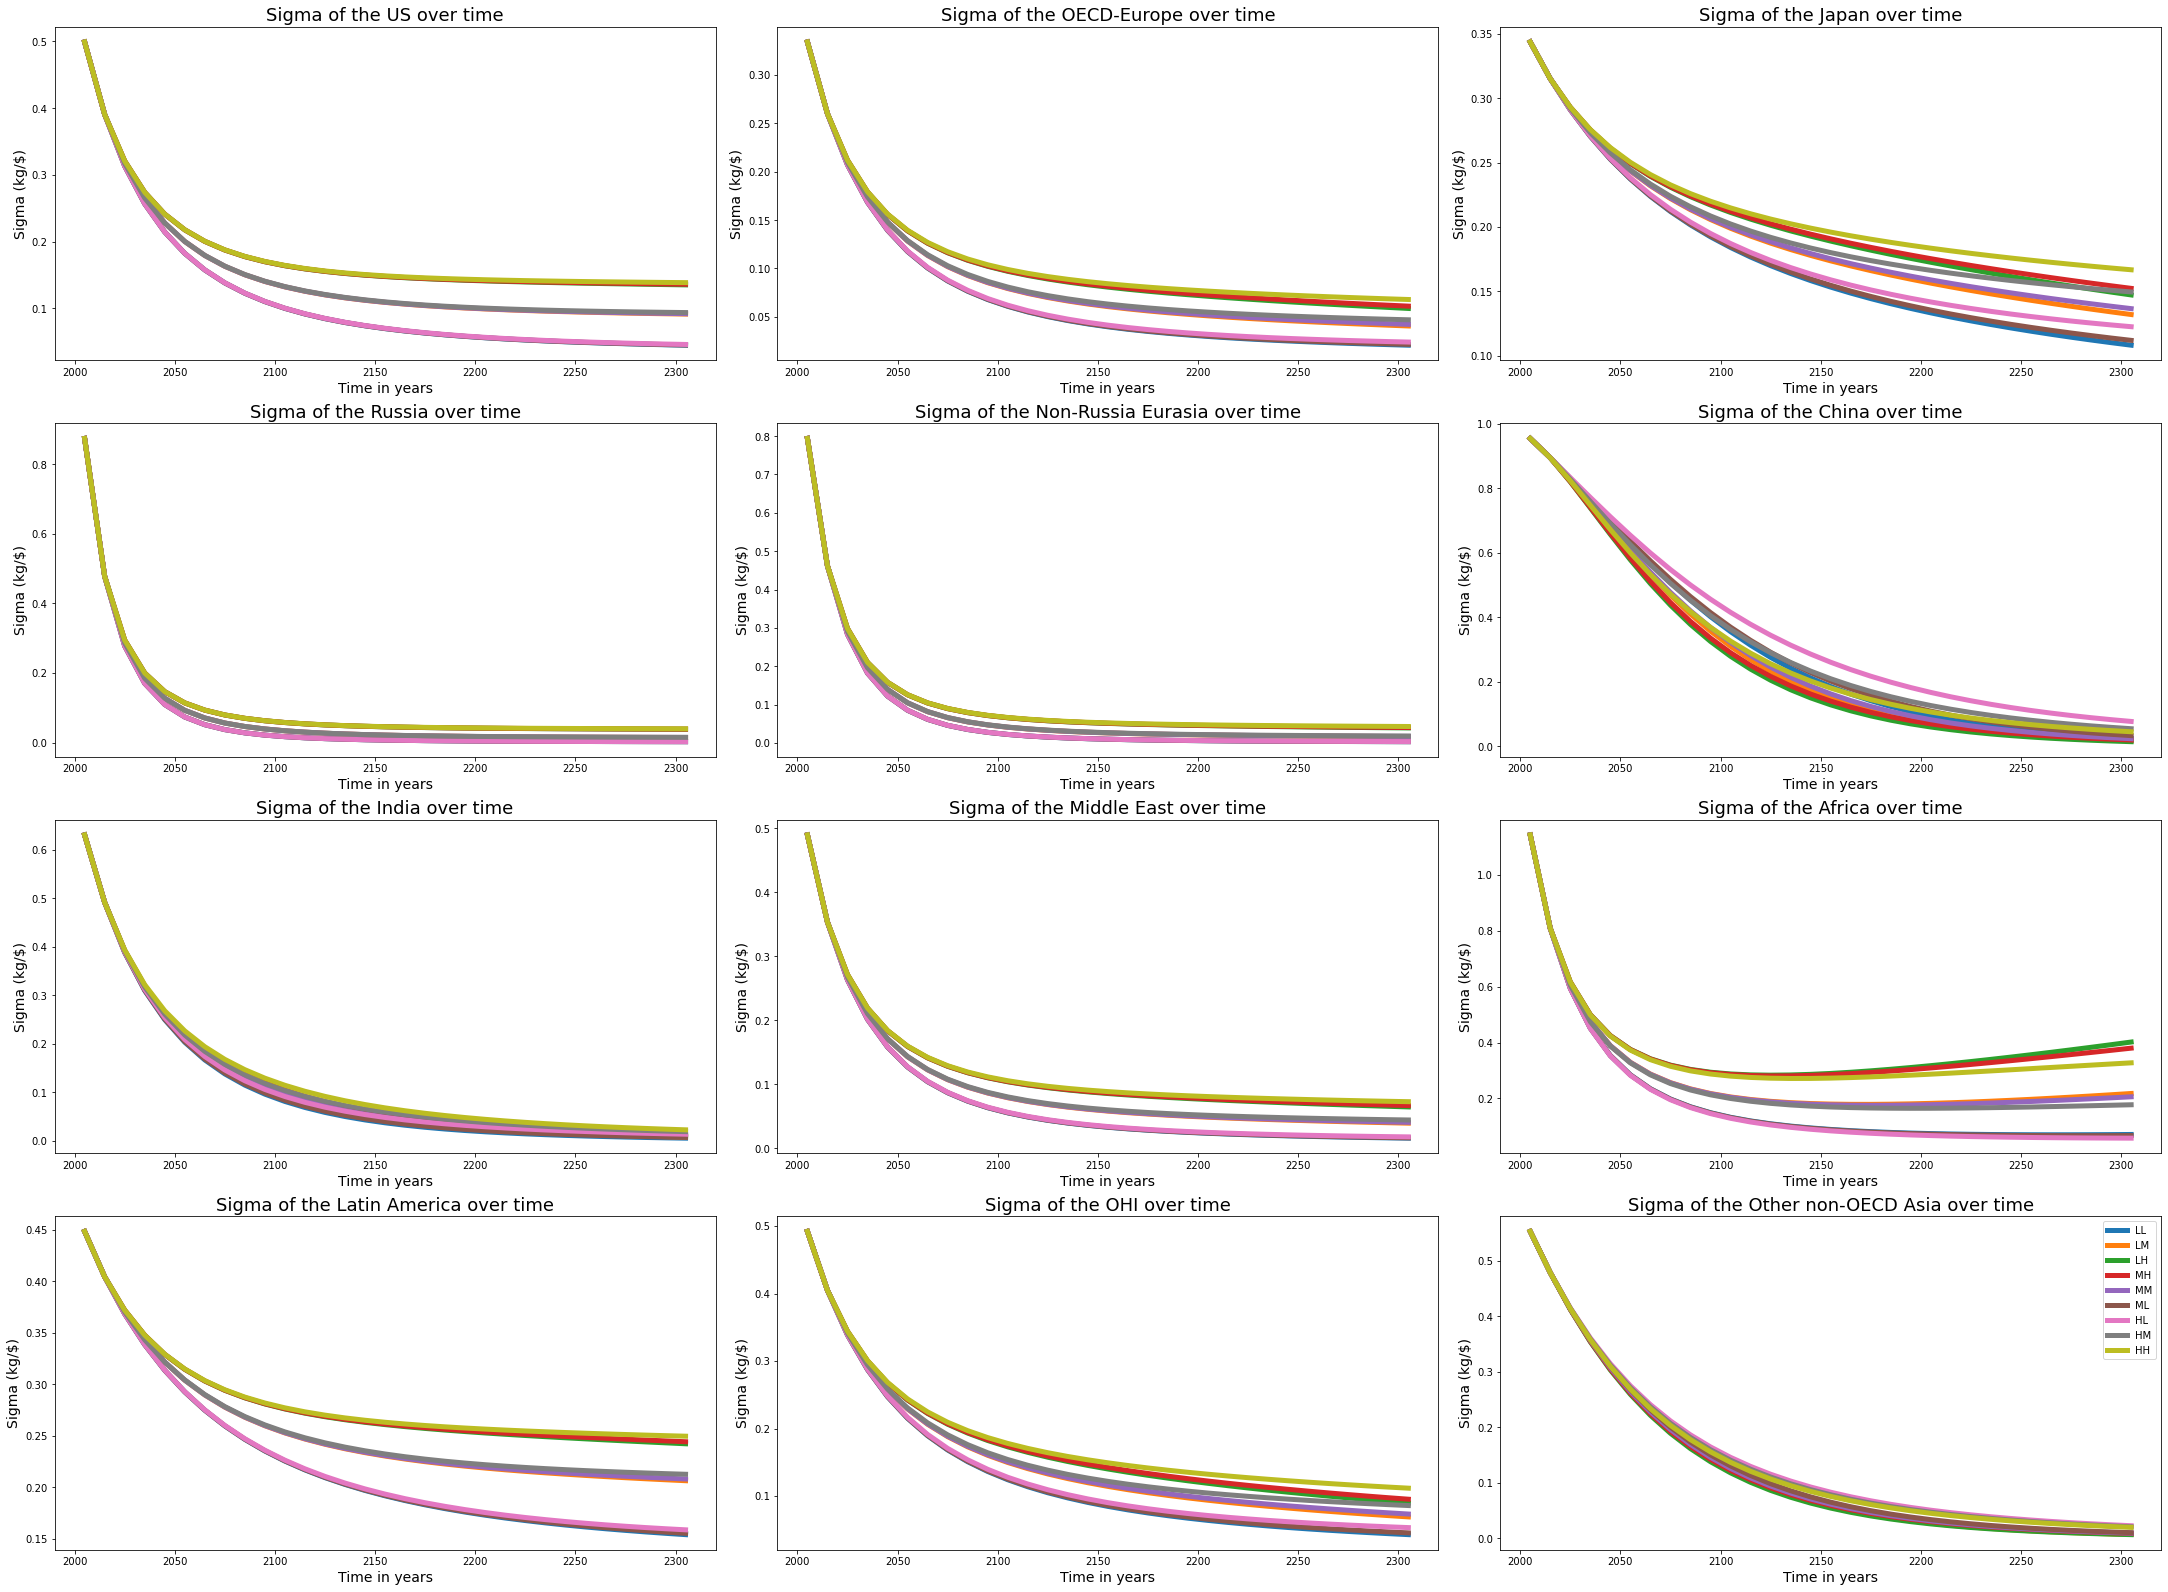

In [15]:
mosaic = [
        ["US", "OECD-Europe",'Japan'],
        ["Russia", "Non-Russia Eurasia",'China'],
        ["India","Middle East","Africa"],
        ["Latin America","OHI","Other non-OECD Asia"]
    ]
line_with = 5
fig = plt.figure(constrained_layout=True, figsize=(30, 22))
ax_dict = fig.subplot_mosaic(mosaic)

ax_dict["US"].plot(years, US_exp_results_sigma, linewidth=line_with, label= US_exp_results_sigma.columns)
ax_dict["US"].set_title(f'Sigma of the US over time', fontsize = 18)
ax_dict["US"].set_xlabel('Time in years', fontsize = 14)
ax_dict["US"].set_ylabel('Sigma (kg/$)', fontsize = 14)


ax_dict["OECD-Europe"].plot(years, Europe_exp_results_sigma, linewidth=line_with, label= Europe_exp_results_sigma.columns)
ax_dict["OECD-Europe"].set_title(f'Sigma of the OECD-Europe over time', fontsize = 18)
ax_dict["OECD-Europe"].set_xlabel('Time in years', fontsize = 14)
ax_dict["OECD-Europe"].set_ylabel('Sigma (kg/$)', fontsize = 14)


ax_dict["Japan"].plot(years, Japan_exp_results_sigma, linewidth=line_with, label= Japan_exp_results_sigma.columns)
ax_dict["Japan"].set_title(f'Sigma of the Japan over time', fontsize = 18)
ax_dict["Japan"].set_xlabel('Time in years', fontsize = 14)
ax_dict["Japan"].set_ylabel('Sigma (kg/$)', fontsize = 14)


ax_dict["Russia"].plot(years, Russia_exp_results_sigma, linewidth=line_with, label= Russia_exp_results_sigma.columns)
ax_dict["Russia"].set_title(f'Sigma of the Russia over time', fontsize = 18)
ax_dict["Russia"].set_xlabel('Time in years', fontsize = 14)
ax_dict["Russia"].set_ylabel('Sigma (kg/$)', fontsize = 14)


ax_dict["Non-Russia Eurasia"].plot(years, Eurasia_exp_results_sigma, linewidth=line_with, label= Eurasia_exp_results_sigma.columns)
ax_dict["Non-Russia Eurasia"].set_title(f'Sigma of the Non-Russia Eurasia over time', fontsize = 18)
ax_dict["Non-Russia Eurasia"].set_xlabel('Time in years', fontsize = 14)
ax_dict["Non-Russia Eurasia"].set_ylabel('Sigma (kg/$)', fontsize = 14)


ax_dict["China"].plot(years, China_exp_results_sigma, linewidth=line_with, label= China_exp_results_sigma.columns)
ax_dict["China"].set_title(f'Sigma of the China over time', fontsize = 18)
ax_dict["China"].set_xlabel('Time in years', fontsize = 14)
ax_dict["China"].set_ylabel('Sigma (kg/$)', fontsize = 14)


ax_dict["India"].plot(years, India_exp_results_sigma, linewidth=line_with, label= India_exp_results_sigma.columns)
ax_dict["India"].set_title(f'Sigma of the India over time', fontsize = 18)
ax_dict["India"].set_xlabel('Time in years', fontsize = 14)
ax_dict["India"].set_ylabel('Sigma (kg/$)', fontsize = 14)


ax_dict["Middle East"].plot(years, ME_exp_results_sigma, linewidth=line_with, label= ME_exp_results_sigma.columns)
ax_dict["Middle East"].set_title(f'Sigma of the Middle East over time', fontsize = 18)
ax_dict["Middle East"].set_xlabel('Time in years', fontsize = 14)
ax_dict["Middle East"].set_ylabel('Sigma (kg/$)', fontsize = 14)


ax_dict["Africa"].plot(years, Africa_exp_results_sigma, linewidth=line_with, label= Africa_exp_results_sigma.columns)
ax_dict["Africa"].set_title(f'Sigma of the Africa over time', fontsize = 18)
ax_dict["Africa"].set_xlabel('Time in years', fontsize = 14)
ax_dict["Africa"].set_ylabel('Sigma (kg/$)', fontsize = 14)


ax_dict["Latin America"].plot(years, LA_exp_results_sigma, linewidth=line_with, label= LA_exp_results_sigma.columns)
ax_dict["Latin America"].set_title(f'Sigma of the Latin America over time', fontsize = 18)
ax_dict["Latin America"].set_xlabel('Time in years', fontsize = 14)
ax_dict["Latin America"].set_ylabel('Sigma (kg/$)', fontsize = 14)


ax_dict["OHI"].plot(years, OHI_exp_results_sigma, linewidth=line_with, label= OHI_exp_results_sigma.columns)
ax_dict["OHI"].set_title(f'Sigma of the OHI over time', fontsize = 18)
ax_dict["OHI"].set_xlabel('Time in years', fontsize = 14)
ax_dict["OHI"].set_ylabel('Sigma (kg/$)', fontsize = 14)


ax_dict["Other non-OECD Asia"].plot(years, Other_Asia_exp_results_sigma, linewidth=line_with, label= Other_Asia_exp_results_sigma.columns)
ax_dict["Other non-OECD Asia"].set_title(f'Sigma of the Other non-OECD Asia over time', fontsize = 18)
ax_dict["Other non-OECD Asia"].set_xlabel('Time in years', fontsize = 14)
ax_dict["Other non-OECD Asia"].set_ylabel('Sigma (kg/$)', fontsize = 14)


plt.legend()
plt.show()

In [58]:
ti_df = pd.DataFrame()

for exp in range (len(exp_list)):
    ti = pd.read_excel(f'results_final/ti_{exp_list[exp]}.xlsx', index_col='Unnamed: 0')
    ti.rename(index={'Atmospheric temperature':f'{exp_list[exp]}'}, inplace = True)
    ti_df = pd.concat([ti_df,ti], axis = 0)

ti_df = ti_df.transpose()

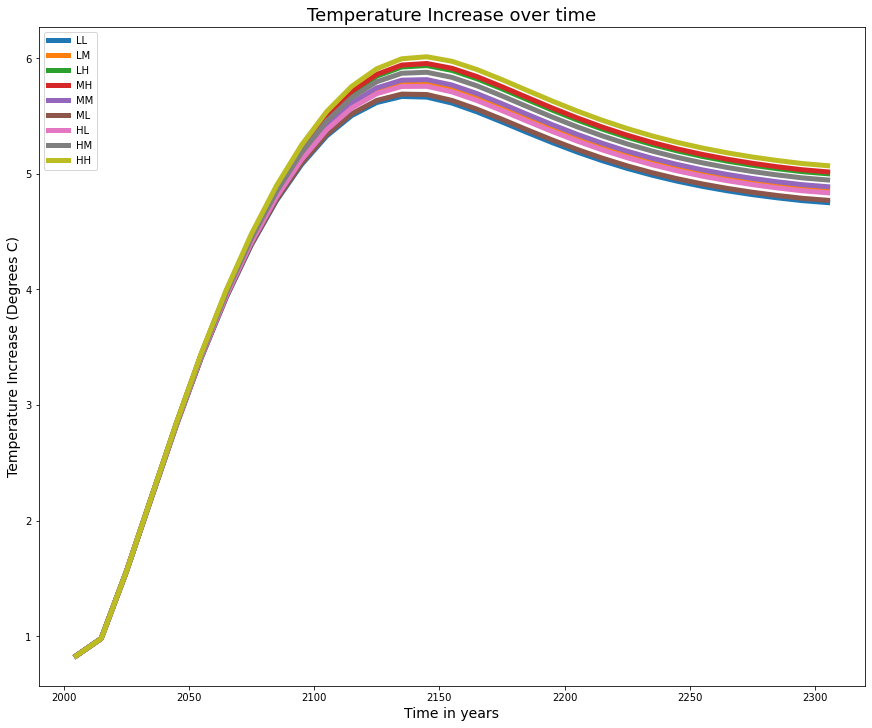

In [62]:
# Set plot
mosaic = """
    AA
    """
line_with = 5
fig = plt.figure(constrained_layout=True, figsize=(12, 10))
ax_dict = fig.subplot_mosaic(mosaic)

ax_dict["A"].plot(years, ti_df, linewidth=line_with, label= ti_df.columns)
ax_dict["A"].set_title('Temperature Increase over time', fontsize = 18)
ax_dict["A"].set_xlabel('Time in years', fontsize = 14)
ax_dict["A"].set_ylabel('Temperature Increase (Degrees C)', fontsize = 14)


plt.legend()
plt.show()